# Usando SQL para Análise de Dados

### Objetivos

Usar a linguagem SQL para analisar e tirar informações importantes de um dataset contendo informações de crédito de diversos clientes de uma instituição financeira.

### Dados

O dataset que será usado no projeto é um .csv que chamado creditocomplete.

O banco de dados contém as seguintes colunas:

- **id** -> número de identificação do cliente
- **idade** -> idade do cliente
- **sexo** -> sexo do cliente (F ou M)
- **dependentes** -> quantidade de dependentes do cliente
- **escolaridade** -> nível de escolaridade do clientes
- **salario_anual** -> faixa salarial do cliente
- **tipo_cartao** -> tipo de cartao do cliente
- **qtd_produtos** -> quantidade de produtos comprados nos últimos 12 meses
- **iteracoes_12m** -> quantidade de iterações/transacoes nos ultimos 12 meses
- **meses_inativo_12m** -> quantidade de meses que o cliente ficou inativo
- **limite_credito** -> limite de credito do cliente
- **valor_transacoes_12m** -> valor das transações dos ultimos 12 meses
- **qtd_transacoes_12m** -> quantidade de transacoes dos ultimos 12 meses ultimos 12 meses

#### Conhecendo os dados

Checando a quantidade de linhas:

``` sql
SELECT count(*) FROM creditocomplete;
```

> 10.127 linhas.

Vamos entender o formato do dataset:

> 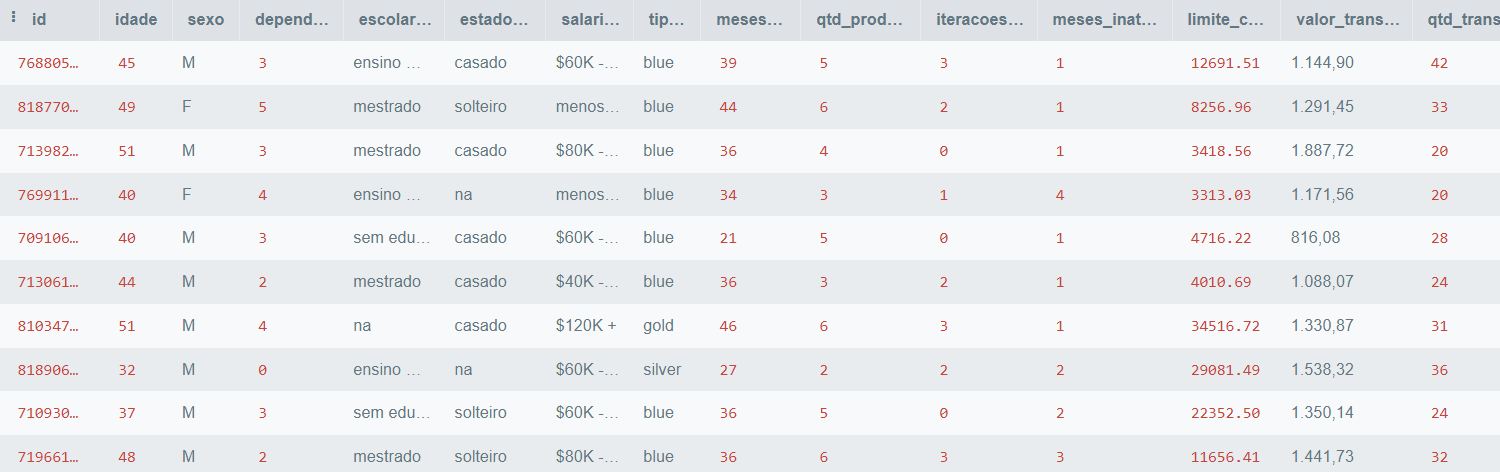

Verificando se há clientes repetidos:

``` sql
SELECT DISTINCT count(id) FROM creditocomplete;
```

> 10.127 linhas.

Não temos clientes duplicados.

### Análise de dados

- Primeiro vamos analisar a distribuição de salário pelo dataset.

``` sql
SELECT COUNT(*) AS 'quantidade', salario_anual FROM creditocomplete GROUP BY salario_anual ORDER BY 'quantidade' DESC;
```

> <img src=".\salario.png" width="300" />

Percebemos que grande maioria dos clientes do banco tem rendas mais baixas. 

- Vamos ver também o perfil dos clientes por sexo.

```sql
SELECT COUNT(*), sexo FROM creditocomplete GROUP BY sexo;
```

> <img src='.\sexo.png' width = '180'/>

Temos uma quantidade quase de igual para igual entre os sexos.

- Agora, vamos ver a distribuição da renda por sexo.

```sql
SELECT COUNT(*) AS 'quantidade', salario_anual, sexo FROM creditocomplete GROUP BY salario_anual, sexo 
ORDER BY sexo DESC;
```

> <img src='.\salario-sexo.png' width = '500'/>

Mulheres tem a renda mais baixa que os homens.

- Indo ainda mais fundo na nossa análise, precisamos entender se há uma ligação entre a média de meses de relacionamento e a média de limite de crédito por sexo e faixa salarial.

```sql
SELECT AVG(meses_de_relacionamento), AVG(limite_credito), sexo, salario_anual FROM creditocomplete GROUP BY sexo, salario_anual ORDER BY salario_anual DESC;
```

> <img src = '.\relacionamento-limite-sexo.png' width = 600/>

Percebemos que apesar de existir um alto nível de fidelização entre os dois gêneros, mesmo que na mesma faixa salarial, o limite de crédito é sempre menor para as mulheres.

- Será que a renda influi no limite?

```sql
SELECT COUNT(*), salario_anual, AVG(limite_credito) FROM creditocomplete GROUP BY salario_anual ORDER BY AVG(limite_credito);
```

> <img src = '.\salario-credito.png' width = 600/>

Conforme o salário anual sobe, o limite oferecido sobe também.

### Conclusão

Essas foram algumas análises extraídas do dataset.

Alguns insights interessantes:

- a maior parte dos clientes possui renda baixa, até 40K
- a maior parte dos clientes é mulher
- os clientes com maiores limites são em sua maioria homens
- os clientes com menores limites são em sua maioria mulheres
- nao existem clientes com salário anual acima de 60K do sexo feminino
- a faixa salarial impacta diretamente no limite de crédito

Com todos esses insights, uma sugestão interessante à instituição financeira seria dar mais atenção às clientes do sexo feminino. Apesar de terem uma renda menor, elas são tão fidelizadas à instituição quanto os homens, porém estão recebendo menos benefícios mesmo sendo a maioria dos clientes. Fazendo isso, o banco teria mais oportunidades de aumentar a satisfação dos clientes e crescer cada vez mais.